In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
# Fetch historical stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2022-12-31')

# Calculate Moving Average (MA)
data['MA'] = data['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
data['Rolling_STD'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['MA'] + (2 * data['Rolling_STD'])
data['Lower Band'] = data['MA'] - (2 * data['Rolling_STD'])

# Calculate Stochastic Oscillator
low_min = data['Low'].rolling(window=14).min()
high_max = data['High'].rolling(window=14).max()
data['%K'] = (data['Close'] - low_min) * 100 / (high_max - low_min)
data['%D'] = data['%K'].rolling(window=3).mean()

# Calculate Average True Range (ATR)
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift(1))
low_close = np.abs(data['Low'] - data['Close'].shift(1))
tr = np.maximum(high_low, high_close)
tr = np.maximum(tr, low_close)
data['ATR'] = tr.rolling(window=14).mean()

[*********************100%***********************]  1 of 1 completed


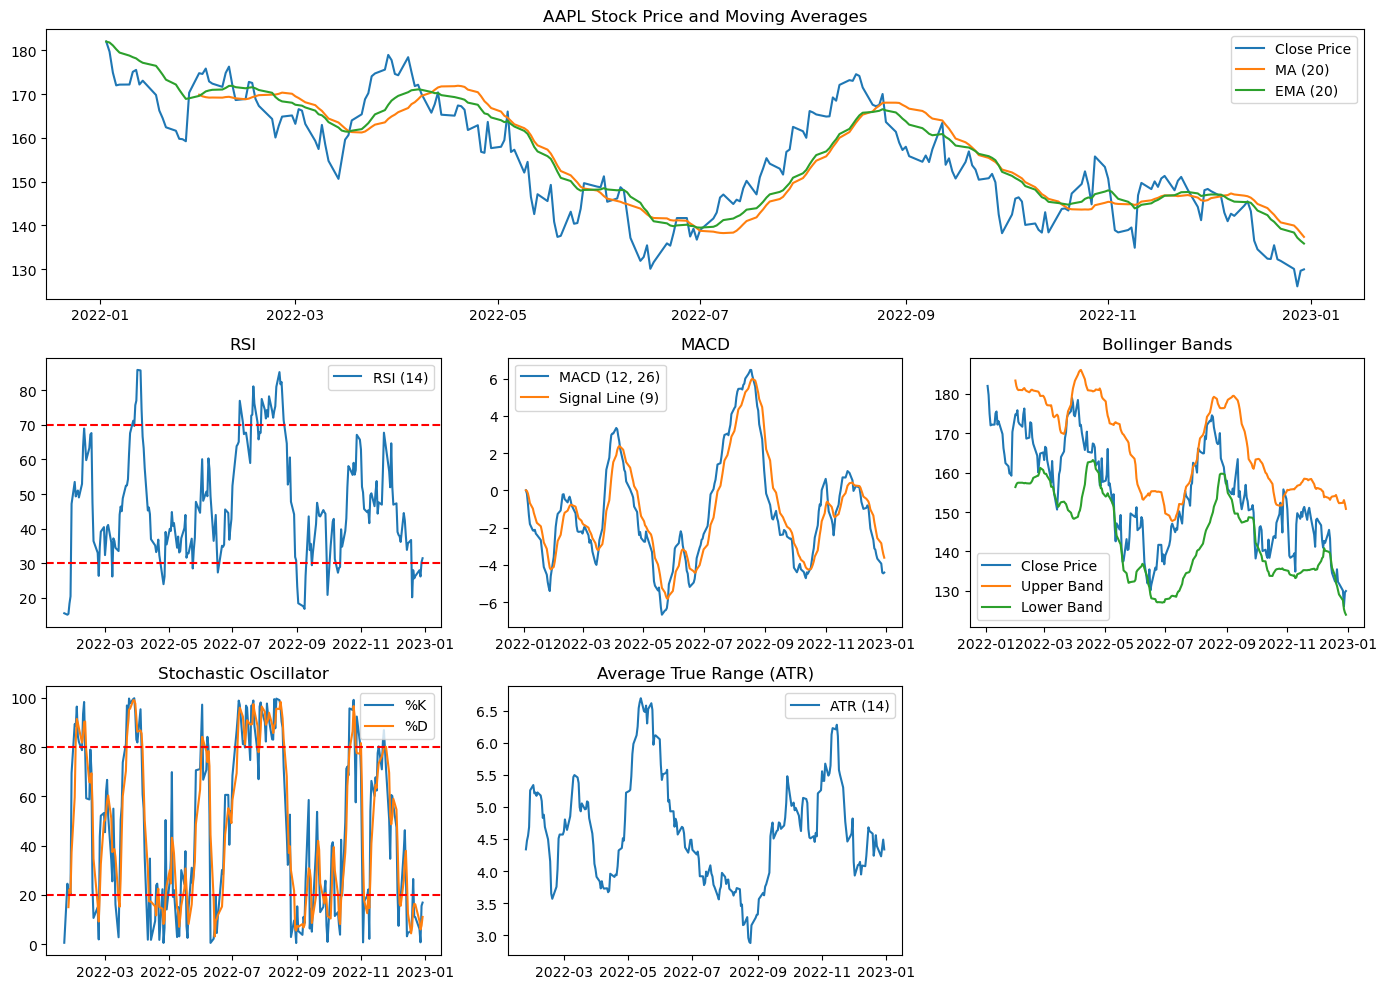

In [15]:
# Plotting
plt.figure(figsize=(14, 10))

# Plot Closing Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA'], label='MA (20)')
plt.plot(data['EMA'], label='EMA (20)')
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.legend()

# Plot RSI
plt.subplot(3, 3, 4)
plt.plot(data['RSI'], label='RSI (14)')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='r', linestyle='--')
plt.title('RSI')
plt.legend()

# Plot MACD
plt.subplot(3, 3, 5)
plt.plot(data['MACD'], label='MACD (12, 26)')
plt.plot(data['Signal Line'], label='Signal Line (9)')
plt.title('MACD')
plt.legend()

# Plot Bollinger Bands
plt.subplot(3, 3, 6)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.legend()

# Plot Stochastic Oscillator
plt.subplot(3, 3, 7)
plt.plot(data['%K'], label='%K')
plt.plot(data['%D'], label='%D')
plt.axhline(y=80, color='r', linestyle='--')
plt.axhline(y=20, color='r', linestyle='--')
plt.title('Stochastic Oscillator')
plt.legend()

# Plot ATR
plt.subplot(3, 3, 8)
plt.plot(data['ATR'], label='ATR (14)')
plt.title('Average True Range (ATR)')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Fetch historical stock data
ticker = 'ROK'
data = yf.download(ticker, start='2022-01-01', end='2024-12-01')

# Adjust display settings
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the display width to a large number
pd.set_option('display.max_colwidth', None) # Set column width to None

# Display the DataFrame
print(data)

# Calculate Moving Average (MA)
data['MA'] = data['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
data['Rolling_STD'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['MA'] + (2 * data['Rolling_STD'])
data['Lower Band'] = data['MA'] - (2 * data['Rolling_STD'])

# Calculate Stochastic Oscillator
low_min = data['Low'].rolling(window=14).min()
high_max = data['High'].rolling(window=14).max()
data['%K'] = (data['Close'] - low_min) * 100 / (high_max - low_min)
data['%D'] = data['%K'].rolling(window=3).mean()

# Calculate Average True Range (ATR)
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift(1))
low_close = np.abs(data['Low'] - data['Close'].shift(1))
tr = np.maximum(high_low, high_close)
tr = np.maximum(tr, low_close)
data['ATR'] = tr.rolling(window=14).mean()

print(data)

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open   Volume
Ticker             ROK         ROK         ROK         ROK         ROK      ROK
Date                                                                           
2022-01-03  321.682404  339.660004  349.000000  335.029999  348.850006   638200
2022-01-04  324.940277  343.100006  344.899994  338.880005  341.519989   588200
2022-01-05  319.504120  337.359985  345.059998  336.940002  344.329987   578100
2022-01-06  317.373169  335.109985  339.869995  332.500000  337.130005   453500
2022-01-07  310.525848  327.880005  336.109985  327.640015  336.109985   613400
...                ...         ...         ...         ...         ...      ...
2024-11-22  290.859985  290.859985  296.000000  278.380005  280.000000  1842300
2024-11-25  298.700012  298.700012  303.549988  293.200012  293.750000  2234800
2024-11-26  296.000000  296.000000  298.399994  293.000000  295.850006  1164700
2024-11-27  294.950012  294.950012  299.

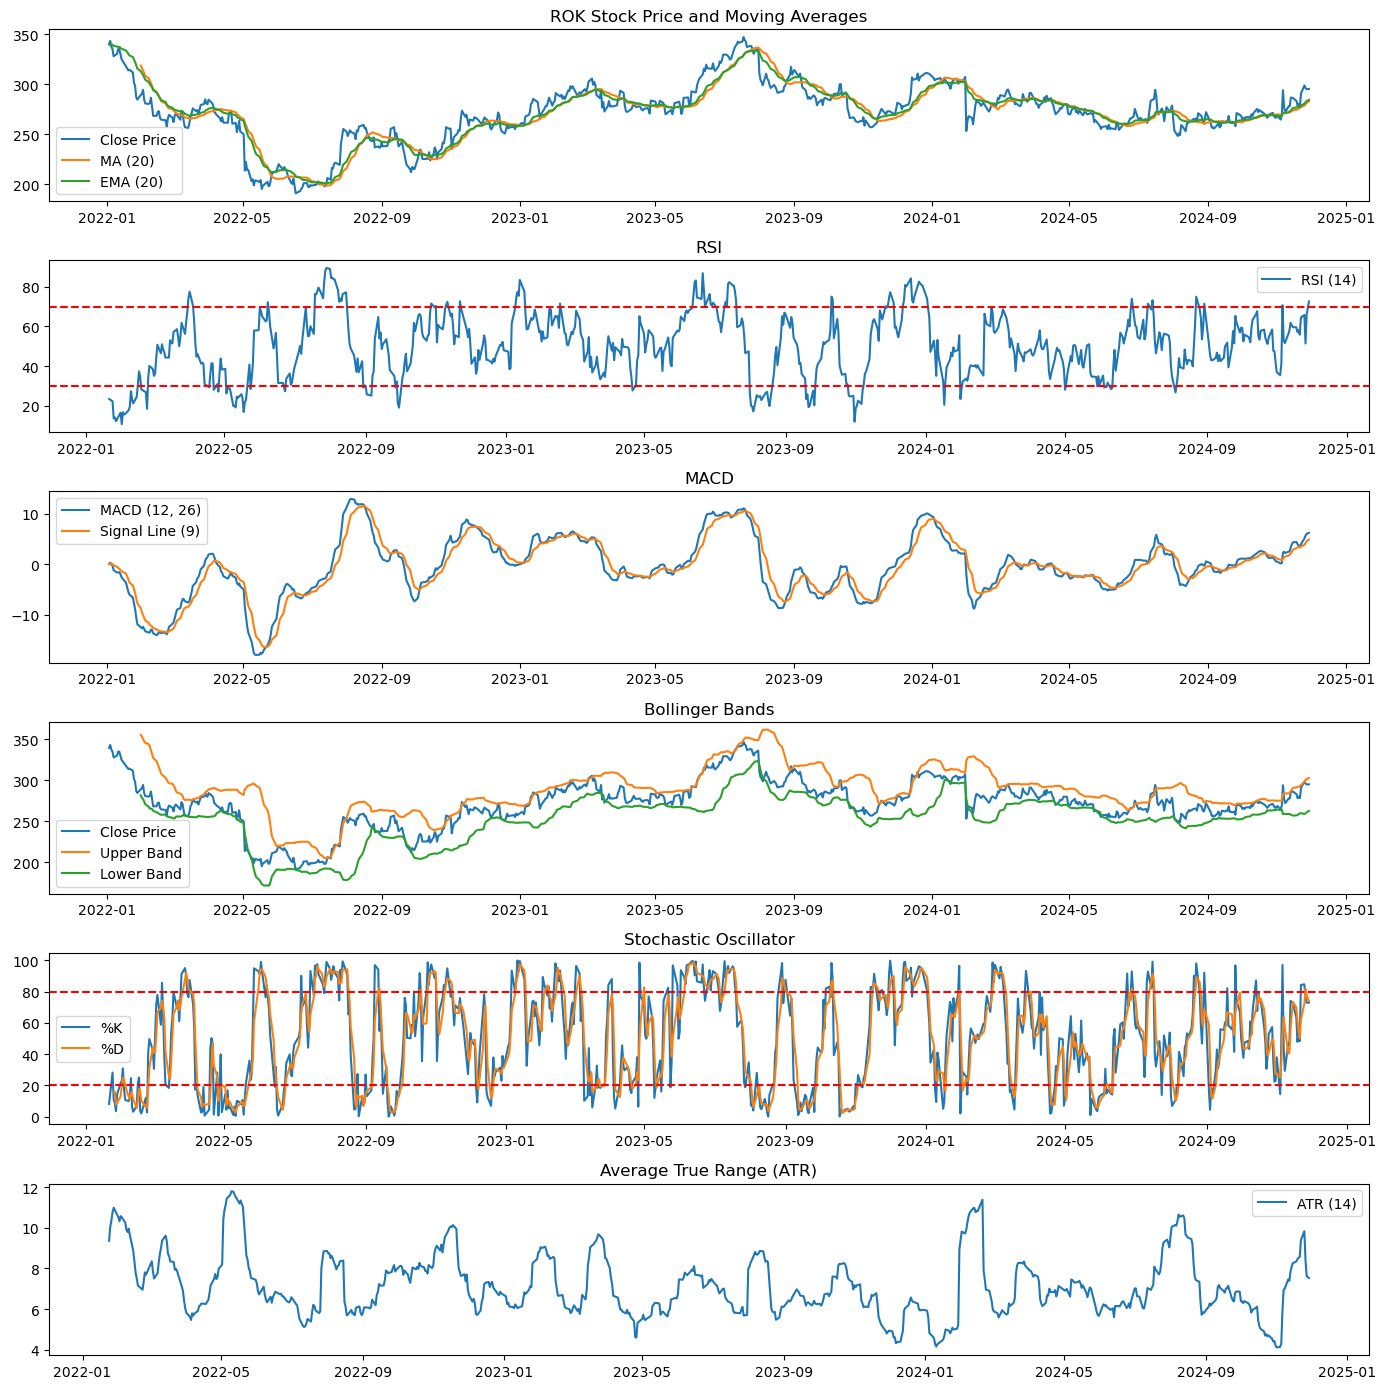

In [38]:
# Plotting
plt.figure(figsize=(14, 14))

# Plot Closing Price and Moving Averages
plt.subplot(6, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA'], label='MA (20)')
plt.plot(data['EMA'], label='EMA (20)')
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.legend()

# Plot RSI
plt.subplot(6, 1, 2)
plt.plot(data['RSI'], label='RSI (14)')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='r', linestyle='--')
plt.title('RSI')
plt.legend()

# Plot MACD
plt.subplot(6, 1, 3)
plt.plot(data['MACD'], label='MACD (12, 26)')
plt.plot(data['Signal Line'], label='Signal Line (9)')
plt.title('MACD')
plt.legend()

# Plot Bollinger Bands
plt.subplot(6, 1, 4)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.legend()

# Plot Stochastic Oscillator
plt.subplot(6, 1, 5)
plt.plot(data['%K'], label='%K')
plt.plot(data['%D'], label='%D')
plt.axhline(y=80, color='r', linestyle='--')
plt.axhline(y=20, color='r', linestyle='--')
plt.title('Stochastic Oscillator')
plt.legend()

# Plot ATR
plt.subplot(6, 1, 6)
plt.plot(data['ATR'], label='ATR (14)')
plt.title('Average True Range (ATR)')
plt.legend()

plt.tight_layout()
plt.show()